# Introducción al Aprendizaje Supervisado - Regresión (Parte II)
## UTN - Facultad Regional Villa Maria
### Autor: Santa Coloma, Milagros
### Materia : Inteligencia Artificial 

Declarar una variable random_state igual al número de alumno en la hoja de cálculo "Entregas TPs" en el Google Drive de la materia.

In [6]:
import numpy as np 

rs = np.random.RandomState(15)

Elegir 1 feature (RM (5)) y entrenar un modelo de regresión polinomial tomando en cuenta cómo dicho feature predice el valor de la casa. Para efectuar la separación entre subconjuntos de entrenamiento y test, usar el random_state correspondiente.

In [63]:
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data

y = boston.target

X_feature = X[:,5]

print(X_feature[0:20])
X = X_feature[:, np.newaxis]

[ 6.575  6.421  7.185  6.998  7.147  6.43   6.012  6.172  5.631  6.004
  6.377  6.009  5.889  5.949  6.096  5.834  5.935  5.99   5.456  5.727]


En base a dicho modelo, mostrar un gráfico donde se aprecie la distancia entre los valores de ŷ y^ y los valores de yy para el feature seleccionado 

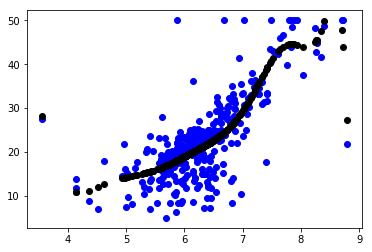

MSE entrenamiento: 30.4916007405
MSE test: 42.4363808412


In [14]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.metrics import mean_squared_error as mse


% matplotlib inline

X_train_rp, X_test_rp, y_train_rp, y_test_rp = tts(X, y, test_size=0.3, random_state=rs)

poly = PF(degree=15)
X_train_poly = poly.fit_transform(X_train_rp, y_train_rp)
poly_regresion=LR()
poly_regresion.fit(X_train_poly, y_train_rp)
X_test_poly= poly.transform(X_test_rp)


plt.plot(X_train_rp, y_train_rp, 'o', color="blue", label= "Datos entrenamiento")
plt.plot(X_train_rp, poly_regresion.predict(X_train_poly), 'o', color="black")
plt.show()

print('MSE entrenamiento:', mse(y_train_rp, poly_regresion.predict(X_train_poly)))
print ('MSE test:', mse(y_test_rp, poly_regresion.predict(X_test_poly)))


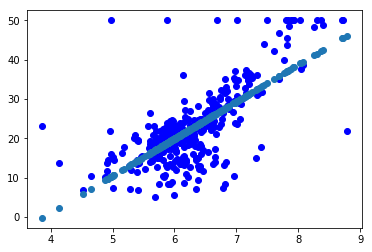

In [17]:
X_train_rl, X_test_rl, y_train_rl, y_test_rl = tts(X, y, test_size=0.3, random_state=rs)
regresion = LR()
regresion.fit(X_train_rl, y_train_rl)
min_pt = X.min() * regresion.coef_[0] + regresion.intercept_
max_pt = X.max() * regresion.coef_[0] + regresion.intercept_
y_pred_train = regresion.predict(X_train_rl)

plt.plot(X_train_rl, y_train_rl, 'o', color="blue", label ="Datos entrenamiento")
plt.plot(X_train_rl, y_pred_train, 'o', label ="prediccion entrenamento rl")
plt.show()

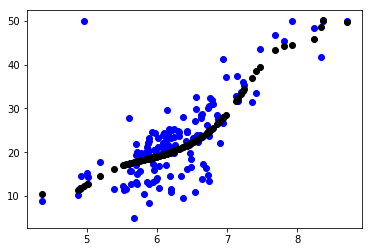

In [25]:
plt.plot(X_test_rp, y_test_rp, 'o', color="blue")
plt.plot(X_test_rp, poly_regresion.predict(X_test_poly),'o', color="black")
plt.show()

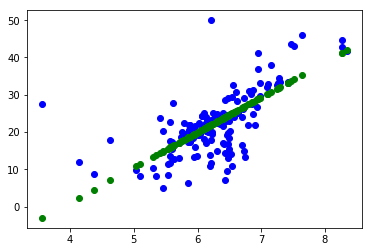

In [22]:
y_pred_test = regresion.predict(X_test_rl)

plt.plot(X_test_rl, y_test_rl, 'o',color="blue")
plt.plot(X_test_rl, y_pred_test, 'o', color= "green")

Entrenar con distintos grados del polinomio el modelo con el feature elegido. Graficar el bias-variance tradeoff para el error cuadrático medio en base a los distintos grados del polinomio, donde se muestren las curvas de error cuadrático medio de entrenamiento y error cuadrático medio de test.

In [71]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.3, random_state=rs)
error_entrenamiento_1=[]
error_entrenamiento=0
for j in [1,2,3,4,5,6,7,8,9,10]:
    poly=PF(j)
    
    X_train_poly = poly.fit_transform(X_train, y_train)
    poly_regressor= LR()
    poly_regressor.fit(X_train_poly, y_train)
    
    error_entrenamiento=mse(y_train, poly_regressor.predict(X_train_poly))
    error_entrenamiento_1.append(error_entrenamiento)
    
    print('Grado de entrenamiento', j)
    print('MSE entreamiento', mse(y_train, poly_regressor.predict(X_train_poly)))

Grado de entrenamiento 1
MSE entreamiento 43.9909051439
Grado de entrenamiento 2
MSE entreamiento 39.0982043524
Grado de entrenamiento 3
MSE entreamiento 37.6131977494
Grado de entrenamiento 4
MSE entreamiento 36.7139847847
Grado de entrenamiento 5
MSE entreamiento 33.8427323206
Grado de entrenamiento 6
MSE entreamiento 33.669311906
Grado de entrenamiento 7
MSE entreamiento 33.6329174198
Grado de entrenamiento 8
MSE entreamiento 33.625197798
Grado de entrenamiento 9
MSE entreamiento 33.6239910295
Grado de entrenamiento 10
MSE entreamiento 33.6214030131


In [72]:
error_prueba=0
error_prueba_1=[]

for k in [1,2,3,4,5,6,7,8,9,10]:
    poly = PF(k)
  
    X_train_poly= poly.fit_transform(X_train, y_train)
    poly_regressor=LR()
    poly_regressor.fit(X_train_poly, y_train)
    X_test_poly= poly.transform(X_test)
    error_prueba= mse(y_test, poly_regressor.predict(X_test_poly))
    error_prueba_1.append(error_prueba)   
                                     
    print('Grado del polinomio:', k)
    print('MSE test: ',mse(y_test, poly_regressor.predict(X_test_poly)))

Grado del polinomio: 1
MSE test:  43.5480339461
Grado del polinomio: 2
MSE test:  35.8927469618
Grado del polinomio: 3
MSE test:  36.447676214
Grado del polinomio: 4
MSE test:  35.821961891
Grado del polinomio: 5
MSE test:  39.1405066436
Grado del polinomio: 6
MSE test:  40.73537511
Grado del polinomio: 7
MSE test:  40.7290690748
Grado del polinomio: 8
MSE test:  40.5763077256
Grado del polinomio: 9
MSE test:  40.4328472551
Grado del polinomio: 10
MSE test:  39.9438618181


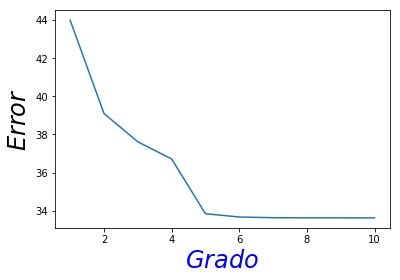

In [74]:
grado_train = [1,2,3,4,5,6,7,8,9,10]

plt.plot(grado_train,error_entrenamiento_1, '-')
plt.xlabel(r"$Grado$", fontsize = 24, color= 'blue')
plt.ylabel(r"$Error$", fontsize = 24, color= 'black')

plt.show()

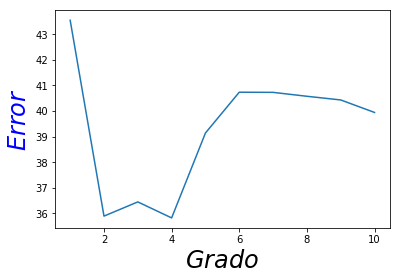

In [75]:
grado_test = [1,2,3,4,5,6,7,8,9,10]

plt.plot(grado_test, error_prueba_1, '-')
plt. xlabel(r"$Grado$", fontsize= 24, color='black')
plt. ylabel(r"$Error$", fontsize= 24, color= "blue")
plt.show()

Especificar cuál es el grado del polinomio en el cual se minimiza el error de test.

El grado del polinomio es 4

Completar el código de KFolds para el modelo de regresión polinomial de grado 5, entrenarlo con el feature elegido e imprimir el error cuadrático medio, promediado entre los 10 folds. Utilizar Shuffle=true y el random_state correspondiente.

In [78]:


from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=rs)

test_error_poly = []
error_total_1 = 0
error_total = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    poly = PF(4)
    
    X_train_poly = poly.fit_transform(X_train, y_train)
    
    poly_regresion = LR()
    poly_regresion.fit (X_train_poly, y_train)
    
    X_test_poly = poly.transform(X_test)
    
    error_entrenamiento_1 = mse(y_train, poly_regresion.predict(X_train_poly))
    error_prueba_1= (mse(y_test, poly_regresion.predict(X_test_poly)))
    
    error_total = error_total + error_prueba_1
    error_total_1 = error_total_1 + error_entrenamiento_1
    
    promedio = error_total/10
    promedio_1 = error_total_1/10
    
print('MSE entrenamiento promedio:', promedio_1)    
print('MSE test promedio: ', promedio)
    
    

MSE entrenamiento promedio: 35.9647896817
MSE test promedio:  38.5940795736
